<a href="https://colab.research.google.com/github/CodeJourneyer2004/customer-churn-decision-analytics/blob/main/churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


In [3]:
file_path = '/content/drive/MyDrive/ZS_Project/telco_churn.csv'
df = pd.read_csv(file_path)

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (7043, 50)


,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [6]:
# ---------- SAFE DATA CLEANING ----------

print("Columns in dataset:")
print(df.columns)

# Handle TotalCharges ONLY if it exists
if 'TotalCharges' in df.columns:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop customerID ONLY if it exists
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

# Drop missing values (safe)
df.dropna(inplace=True)

print("Cleaned Dataset Shape:", df.shape)


Columns in dataset:
Index(['Customer ID', 'Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married',
       'Dependents', 'Number of Dependents', 'Country', 'State', 'City',
       'Zip Code', 'Latitude', 'Longitude', 'Population', 'Quarter',
       'Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'Customer Status', 'Churn Label',
       'Churn Score', 'CLTV', 'Churn Category', 'Churn Reason'],
      dtype='object')
Clean

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])


In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])


In [14]:
# Identify target column safely
target_col = 'Churn' if 'Churn' in df.columns else df.columns[-1]

X = df.drop(target_col, axis=1)
y = df[target_col]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [15]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)


In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np

def evaluate_model(model_name, y_true, y_pred):
    print(f"\n{model_name} Performance")
    print("-" * 40)

    unique_classes = np.unique(y_true)

    print("Accuracy :", round(accuracy_score(y_true, y_pred), 3))

    # Binary vs Multiclass handling
    if len(unique_classes) == 2:
        print("Precision:", round(precision_score(y_true, y_pred), 3))
        print("Recall   :", round(recall_score(y_true, y_pred), 3))
        print("F1 Score :", round(f1_score(y_true, y_pred), 3))
    else:
        print("Precision:", round(precision_score(y_true, y_pred, average='weighted'), 3))
        print("Recall   :", round(recall_score(y_true, y_pred, average='weighted'), 3))
        print("F1 Score :", round(f1_score(y_true, y_pred, average='weighted'), 3))

    print("\nClassification Report:\n")
    print(classification_report(y_true, y_pred))


In [21]:
evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)



Logistic Regression Performance
----------------------------------------
Accuracy : 0.447
Precision: 0.413
Recall   : 0.447
F1 Score : 0.427

Classification Report:

              precision    recall  f1-score   support

           0       0.40      0.40      0.40        10
           1       0.68      0.76      0.72        17
           2       0.56      0.67      0.61        27
           3       0.60      0.60      0.60        25
           4       0.50      0.44      0.47         9
           5       0.25      0.17      0.20        12
           7       0.45      0.62      0.53         8
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         4
          14       0.33      0.33      0.33         6
          15       0.0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

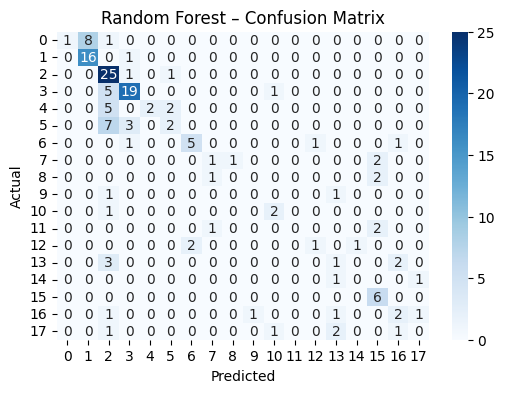

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues'
)
plt.title("Random Forest – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [23]:
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance.head(10)


,Feature,Importance
48,Churn Category,0.124558
12,Latitude,0.048723
14,Population,0.048051
25,Avg Monthly GB Download,0.046879
11,Zip Code,0.044876
42,Total Revenue,0.043408
47,CLTV,0.043360
2,Age,0.043214
13,Longitude,0.042649
46,Churn Score,0.042320


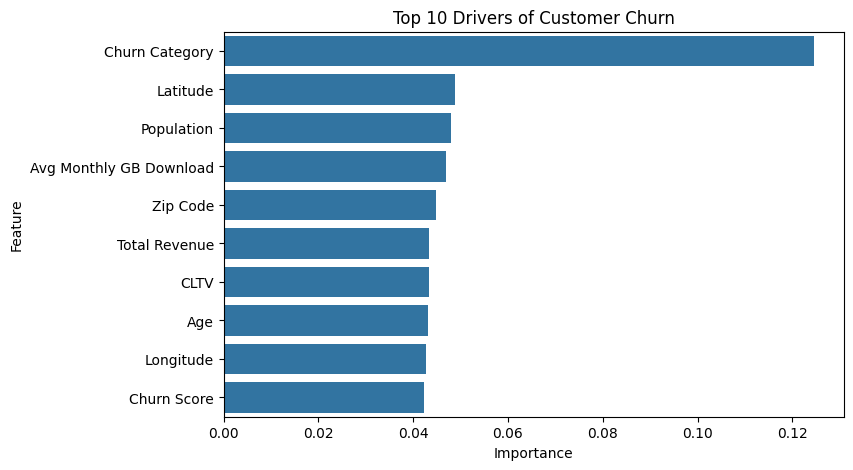

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance.head(10)
)
plt.title("Top 10 Drivers of Customer Churn")
plt.show()


In [25]:
df_test = X_test.copy()
df_test['Actual_Churn'] = y_test.values
df_test['Predicted_Churn'] = y_pred_rf

high_risk_customers = df_test[df_test['Predicted_Churn'] == 1]

print("High-risk customers identified:", high_risk_customers.shape[0])


High-risk customers identified: 24


FINAL BUSINESS INSIGHTS:
• Short-term or flexible plans show higher churn likelihood.
• Pricing, tenure, and usage-related variables are dominant churn drivers.
• Random Forest achieved higher recall, reducing missed churn cases.

DECISION RECOMMENDATIONS:
• Prioritize retention offers for predicted high-risk customers.
• Encourage long-term contracts via targeted incentives.
• Use churn scores to optimize marketing and customer success efforts.